In [1]:
# Intro to Neural Networks
# Assignment 02
# Jinkang (Derrick) Xiang
# UWO ID: 251127537
# jxiang27@uwo.ca
# Jan. 26th, 2021

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from itertools import islice # import this to slice time within the "for" loop

In [3]:
# parameters
Rm     = 1e6    # resistance (ohm)
Cm     = 2e-8   # capacitance (farad)
taum   = Rm*Cm  # time constant (seconds)
Vr     = -.060  # resting membrane potential (volt)
Vreset = -.070  # membrane potential after spike (volt)
Vth    = -.050  # spike threshold (volt)
Vs     = .020   # spiking potential (volt)

In [4]:
dt     = .001   # simulation time step (seconds)
T      = 1.0    # total time to simulate (seconds)
time   = np.linspace(dt,T,int(T/dt)) # vector of timepoints we will simulate

In [5]:
def initialize_simulation():
    # zero-pad membrane potential vector 'V' and spike vector 'spikes'
    V      = np.zeros(time.size) # preallocate vector for simulated membrane potentials
    spikes = np.zeros(time.size) # vector to denote when spikes happen - spikes will be added after LIF simulation
    V[0]   = Vr # set first time point to resting potential
    return V,spikes

def logistic_map(a,x0,nsteps):
    # function to simulate logistic map:
    # x_{n+1} = a * x_n * (1-x_n)
    x    = np.zeros(nsteps)
    x[0] = x0
    for ii in range(1,nsteps):
        x[ii] = a * x[ii-1] * (1-x[ii-1])
    return x

def plot_potentials(time,V,timeSpikes):
    # plots membrane potential (V) against time (time), and marks spikes with red markers (timeSpikes)
    plt.show()
    plt.plot(time,V,'k',timeSpikes,np.ones(timeSpikes.size)*Vs,'ro')
    plt.ylabel('membrane potential (mV)')
    plt.xlabel('time (seconds)')

def check_solutions( result, solution_filename ):
    # check solutions against provided values
    solution = np.load( solution_filename )
    if ( np.linalg.norm( np.abs( result - solution ) ) < 0.1 ):
        print( '\n\n ---- problem solved successfully ---- \n\n' )

In [6]:
def integrate_and_fire( V, spikes, ii, Ie ):
    # function to integrate changes in local membrane potential and fire if threshold reached
    # V - vector of membrane potential
    # spikes - spike marker vector
    # ii - index (applied to V and spikes) for current time step
    # Ie - input current at this time step (scalar of unit amp)

    # 1: calculate change in membrane potential (dV)
    dV = dt * (Vr - V[ii-1] + Rm*Ie) / taum 
    # 2: integrate over given time step (Euler method)
    V[ii] = V[ii-1] + dV
    # 3: does the membrane potential exceed threshold (V > Vth)?
    if V[ii] > Vth:
        spikes[ii] = 1
        V[ii] = Vreset

    return V,spikes # output the membrane potential vector and the {0,1} vector of spikes

In [7]:
def problem_1():
    #////////////////////////////////////
    #  problem 1 - step current input //
    #//////////////////////////////////
    #
    # Implement a leaky integrate and fire (LIF) neuron with parameters given 
    # above. 
    # 
    # Create a current input which:
    #       - starts at 0 A
    #       - steps up to 15 nA at stim_time[0]
    #       - steps down to 0 A at stim_time[1]
    #
    # Output:
    # Plot the resulting simulated membrane potential of the LIF neuron.
    #

    # problem-specific parameters
    stim_time = [.2,.8] # time (seconds) when current turns ON and turns OFF
    
    V,spikes = initialize_simulation() 	# initialize simulation
        
    for ii in range(1,len(time)):
        if ii >= int(stim_time[0]/dt) and ii <= int(stim_time[1]/dt):
            Ie = 1.5e-8
        else:
            Ie = 0
            
        V, spikes = integrate_and_fire( V, spikes, ii, Ie )
    
    # add spikes to create membrane potential waveforms
    V[spikes==1] = Vs
    
    # plot membrane potential
    plot_potentials(time,V,time[spikes==1])
    plt.title('P1 : step current input')

    # output:
    V_prob1 = V
    return V_prob1



 ---- problem solved successfully ---- 




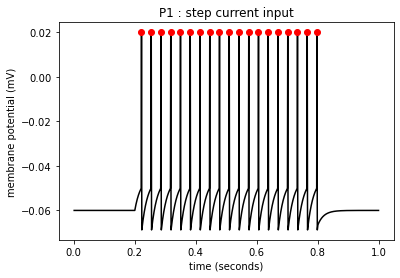

In [8]:
V_prob1 = problem_1()
check_solutions( V_prob1, 'problem1.npy' )

In [9]:
def problem_2():
    #//////////////////////////////////////////
    # problem 2 - oscillating current input //
    #////////////////////////////////////////
    # Use the LIF implementation from problem 1.
    # Create a current input which:
    #       - starts at 0 A
    #       - oscillates with a cosine of amplitude 20 nA at stim_time[0]
    #       - stops oscillating and returns to 0 A at stim_time[1]
    #
    # output:
    # Plot the resulting simulated membrange potential of the LIF, and save the 
    # membrane potential in a vector named "V_prob2".
    
    # problem-specific parameters
    f     = 10 # Hz
    phase = np.pi
    stim_time = [.2,.8]

    V,spikes = initialize_simulation()  # initialize simulation

    for ii in range(1,len(time)):
        if time[ii] >= stim_time[0] and time[ii] <= stim_time[1]:
            Ie = 2e-8 * np.cos(2*np.pi*f*time[ii] + phase)
        else:
            Ie = 0
            
        V, spikes = integrate_and_fire( V, spikes, ii, Ie )
        
    # add spikes
    V[spikes==1] = Vs
    
    # PLOT membrane potential
    plot_potentials(time,V,time[spikes==1])
    plt.title('Problem 2: Oscillating current input')
    
    # output:
    V_prob2 = V
    return V_prob2

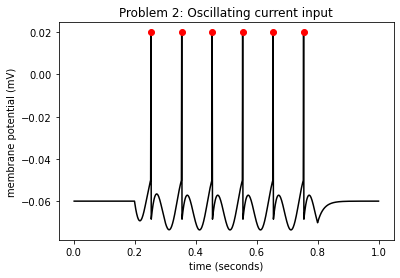

In [10]:
V_prob2 = problem_2()
check_solutions( V_prob2, 'problem2.npy' )

In [11]:
def problem_3():
    #////////////////////////////////////////////////////
    # problem 3 - scan across oscillation frequencies //
    #//////////////////////////////////////////////////
    # Using previous problem's simulation (i.e. oscillating current input),
    # run a simulation per frequency stored in the variable "freq".
    # 
    # output: plot the results, and then save the number of spikes generated in 
    # each run in a variable named "nspikes_prob3".
    
    # problem-specific parameters
    freq  = np.linspace(15,50,(50-15)+1) # Hz
    phase = np.pi
    oscillation_amplitude = 4e-8 # amps
    stim_time = [.2,.8]

    # initialize array
    nSpikes  = np.zeros(freq.size)

    # iterate each freq
    for j,f in enumerate(freq):
        V,spikes = initialize_simulation()  # initialize simulation
        for ii in range(1, len(time)):
            if time[ii] >= stim_time[0] and time[ii] <= stim_time[1]:
                Ie = oscillation_amplitude * np.cos(2*np.pi*f*time[ii] + phase)
            else:
                Ie = 0
            V, spikes = integrate_and_fire( V, spikes, ii, Ie )
        nSpikes[j] = np.sum(spikes)
    
    # PLOT number of spikes per frequency
    plt.show()
    plt.plot( freq, nSpikes, 'ko' )
    plt.title('Problem 3: Scan across oscillating frequencies')
    plt.xlabel('frequency (Hz)')
    plt.ylabel('# of spikes')
    
    return nSpikes

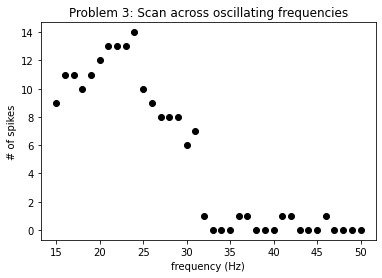

In [12]:
nSpikes = problem_3()

In [13]:
check_solutions(nSpikes, 'problem3.npy')

In [14]:
def problem_4():
    #//////////////////////////////////////////
    # problem 4 - fluctuating current input //
    #////////////////////////////////////////
    # Use the LIF implementation from simulation 1.
    # Create a current input using a logistic map in the chaotic regime (a=4).
    # Add an additional current step starting at stim_time[0] and ending at 
    # stim_time[1]
    #
    # output:
    # Plot the resulting simulated membrange potential of the LIF, and save the 
    # membrane potential in a vector named "V_prob4".
    
    # Parameters:
    a = 4; lm_x0 = 0.6; lm_range = 5e-8; # parameters for logistic map (ensure the mean is 0 by subtracting 0.5)
    current_step = 1e-8
    stim_time = [.2,.8]

    V,spikes = initialize_simulation() 	# initialize simulation
    x = (logistic_map(a, lm_x0, len(time)) - 0.5) * lm_range
    
    for ii in range(1, len(time)):
        if time[ii]>=stim_time[0] and time[ii]<=stim_time[1]:
            Ie = x[ii] + current_step
        else:
            Ie = x[ii]
            
        V, spikes = integrate_and_fire( V, spikes, ii, Ie )
    
    # add spikes
    V[spikes==1] = Vs
    
    # PLOT membrane potential
    plot_potentials(time,V,time[spikes==1])
    plt.title('Problem 4: Chaotic input')

    # output:
    V_prob4 = V
    return V_prob4



 ---- problem solved successfully ---- 




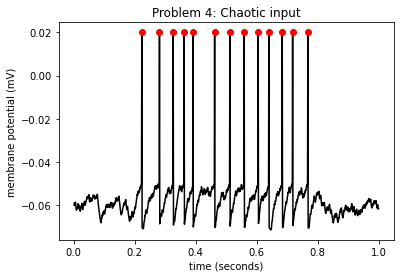

In [15]:
V_prob4 = problem_4()

check_solutions( V_prob4, 'problem4.npy' )